# Sharks attack

Let's begin importing the libraries necesary to conduct this project

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

In [2]:
sharks = pd.read_csv("../shark-attack/attacks.csv", index_col=0, encoding = "ISO-8859-1") #encoding = "utf-8"

In [3]:
sharks.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Case Number,,,,,,,,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
sharks=sharks.rename(columns={"Sex ": "Sex", "Species ": "Species"})
sharks=sharks.drop(columns=['Unnamed: 22', 'Unnamed: 23'])


In [6]:
def find_month(string):
    months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    try:
        for month in months:
            if re.search(month,string):
                return month
    except TypeError:
        pass
        #return "Non"
    
sharks['Month'] = sharks['Date'].apply(find_month)
sharks['Month'].fillna(value="Unk",inplace=True) 
sharks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25723 entries, 2018.06.25 to xx
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6302 non-null   object 
 1   Year                    6300 non-null   float64
 2   Type                    6298 non-null   object 
 3   Country                 6252 non-null   object 
 4   Area                    5847 non-null   object 
 5   Location                5762 non-null   object 
 6   Activity                5758 non-null   object 
 7   Name                    6092 non-null   object 
 8   Sex                     5737 non-null   object 
 9   Age                     3471 non-null   object 
 10  Injury                  6274 non-null   object 
 11  Fatal (Y/N)             5763 non-null   object 
 12  Time                    2948 non-null   object 
 13  Species                 3464 non-null   object 
 14  Investigator or Source  6285 non-null

In [7]:
sharks['Type'] = sharks['Type'].apply(lambda x: "Boating" if x == "Boat" else x)
sharks['Type'] = sharks['Type'].apply(lambda x: "Boating" if x == "Boatomg" else x)
sharks['Type'] = sharks['Type'].apply(lambda x: "Unknown" if x == "Questionable" else x)
sharks['Type'] = sharks['Type'].apply(lambda x: "Unknown" if x == "Invalid" else x)
sharks['Type'].fillna("Unknown",inplace=True) 
sharks['Type'].unique()

array(['Boating', 'Unprovoked', 'Unknown', 'Provoked', 'Sea Disaster'],
      dtype=object)

In [8]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25723 entries, 2018.06.25 to xx
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6302 non-null   object 
 1   Year                    6300 non-null   float64
 2   Type                    25723 non-null  object 
 3   Country                 6252 non-null   object 
 4   Area                    5847 non-null   object 
 5   Location                5762 non-null   object 
 6   Activity                5758 non-null   object 
 7   Name                    6092 non-null   object 
 8   Sex                     5737 non-null   object 
 9   Age                     3471 non-null   object 
 10  Injury                  6274 non-null   object 
 11  Fatal (Y/N)             5763 non-null   object 
 12  Time                    2948 non-null   object 
 13  Species                 3464 non-null   object 
 14  Investigator or Source  6285 non-null

In [9]:
sharks["Sex"].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [10]:
sharks['Sex'] = sharks['Sex'].apply(lambda x: "M" if x == "M " else x)
sharks['Sex'] = sharks['Sex'].apply(lambda x: "UNKNOWN" if x == "N" else x)
sharks['Sex'] = sharks['Sex'].apply(lambda x: "UNKNOWN" if x == "lli" else x)
sharks['Sex'] = sharks['Sex'].apply(lambda x: "UNKNOWN" if x == "." else x)
sharks['Sex'].fillna("UNKNOWN",inplace=True) 
sharks["Sex"].unique()

array(['F', 'M', 'UNKNOWN'], dtype=object)

In [11]:
sharks["Fatal (Y/N)"].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
y             1
N             1
Name: Fatal (Y/N), dtype: int64

In [12]:
sharks['Fatal (Y/N)'] = sharks['Fatal (Y/N)'].apply(lambda x: "N" if x == " N" else x)
sharks['Fatal (Y/N)'] = sharks['Fatal (Y/N)'].apply(lambda x: "Y" if x == "y" else x)
#As they were only a few, I checked them
sharks['Fatal (Y/N)'] = sharks['Fatal (Y/N)'].apply(lambda x: "N" if x == "M" else x)
sharks['Fatal (Y/N)'] = sharks['Fatal (Y/N)'].apply(lambda x: "N" if x == "2017" else x)
sharks['Age'].fillna("UNKNOWN",inplace=True) 


In [13]:
sharks['Country'].fillna("UNKNOWN",inplace=True) 
sharks['Country'] = sharks['Country'].apply(lambda x: x.upper())
sharks['Country'] = sharks['Country'].apply(lambda x: "UNKNOWN" if ("/" in list(x)) else x)
sharks['Country'] = sharks['Country'].apply(lambda x: "UNKNOWN" if ("?" in list(x)) else x)
sharks['Country'] = sharks['Country'].apply(lambda x: "AFRICA" if x=="COAST OF AFRICA" else x)


In [14]:
sharks['Area'].fillna("Unknown",inplace=True) 
sharks['Location'].fillna("Unknown",inplace=True) 
sharks['Time'].fillna("Unknown",inplace=True) 
sharks['Species'].fillna("Unknown",inplace=True) 
sharks['Name'].fillna("Unknown",inplace=True) 
sharks['Fatal (Y/N)'].fillna("Unknown",inplace=True) 
sharks['Investigator or Source'].fillna("Unknown",inplace=True)

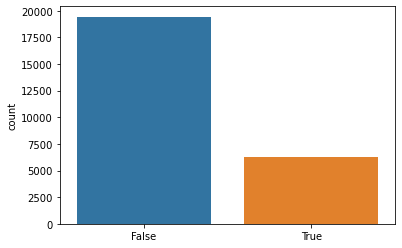

In [15]:
sns.countplot(x=(sharks["Case Number.1"] == sharks["Case Number.2"]))  #'href formula', 'href',
plt.show()

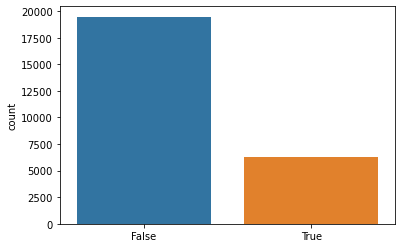

In [16]:
sns.countplot(x=(sharks['href formula'] == sharks['href']))  #'href formula', 'href',
plt.show()

In [17]:
sharks=sharks.rename(columns={"Case Number.1": "Case Number", "href ": "link"})
sharks=sharks.drop(columns=['href formula', 'Case Number.2'])

In [18]:
species = sharks['Species'].unique()

In [19]:

def clean_species(string):
    species = ["wobbegong","tiger","bull","grey","nurse","cookiecutter","spinner","white","sandtiger",
               "eeef","bronze whaler","galapagos","blacktip","hammerhead","mako","blue","salmon","porbeagle",
               "raggedtooth","zambesi","whitetip","lemon","thresher","sandtiger","spurdog","reef"
               ,"bronze whale","seven-gill","sevengill","angel","goblin","sandbar","copper","whaler"
               ,"dusky","leopard","sand","zambezi","silky","whale","dog","blackfin","albimarginatus"
               ,"carpet","broadnose","bonita","scyliorhinus canicula","cow","cookie cutter","smoothhound"
               ,"basking","catsharks","hooked","carcharhinid","gaffed","silvertip"]

    doubts = ["hoax","not confirmed","invalid incident","questionable","not a shark","doubtful"
            "no shark","not cofirmed","unconfired","unconfirmed","could not be determined","stunt"]    
    
    for shark in species:
        if re.search(shark,string.lower()):
            return shark.capitalize()
        
    for doubt in doubts:
        if re.search(doubt,string.lower()):
            return "Questionable"

    return "Unknown"

sharks['Species'] = sharks['Species'].apply(clean_species)


In [20]:
sharks[sharks['Species'] == "Questionable"].shape

(386, 20)

In [21]:
sharks=sharks[sharks['Species'] != "Questionable"]

# Visualization

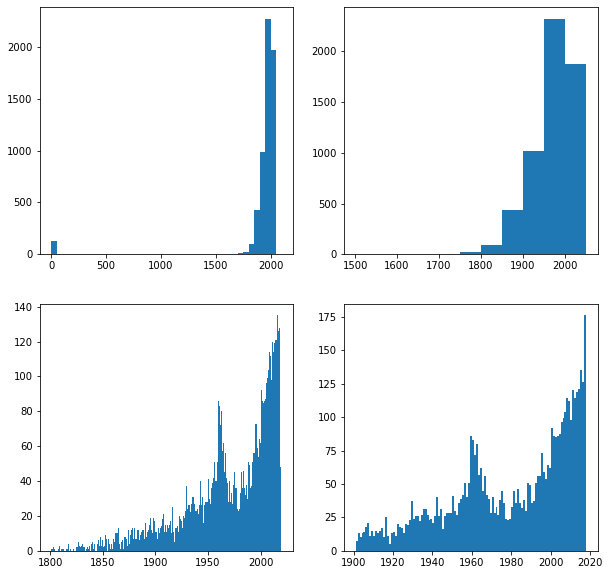

In [22]:
plt.figure(figsize=(10,10))
plt.subplot( 2,2, 1)
bins_y=np.arange(0, 2051 + 50, 50)
plt.hist(sharks["Year"],bins=bins_y)
plt.subplot( 2,2, 2)
bins_y=np.arange(1501, 2051 + 50, 50)
plt.hist(sharks["Year"],bins=bins_y)
plt.subplot( 2,2, 3)
bins_y=np.arange(1801, 2021)
plt.hist(sharks["Year"],bins=bins_y)
plt.subplot( 2,2, 4)
bins_y=np.arange(1901, 2019)
plt.hist(sharks["Year"],bins=bins_y)
plt.show()

Spike of sharks attack in year 1960

https://science.sciencemag.org/content/134/3472/87



In [23]:
sharks[sharks["Year"] <=1800].shape

(167, 20)

In [24]:
sharks[sharks["Year"] >=1901].shape

(5219, 20)

In [25]:
sharks20 =sharks[(sharks["Year"] >=1901) & (sharks["Year"] < 2001)]
sharks21 =sharks[sharks["Year"] >=2001]
sharks =sharks[sharks["Year"] >=1801]

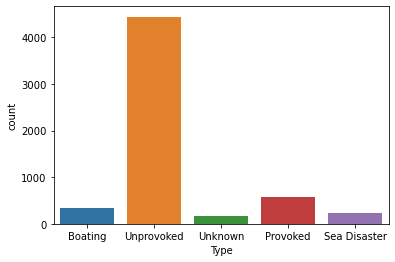

['Boating' 'Unprovoked' 'Unknown' 'Provoked' 'Sea Disaster']


In [26]:
sns.countplot(x=(sharks["Type"]))
plt.show()
print(sharks["Type"].unique())

In [27]:
types = sharks["Type"].dropna().sort_values(ascending=False).unique()
types

array(['Unprovoked', 'Unknown', 'Sea Disaster', 'Provoked', 'Boating'],
      dtype=object)

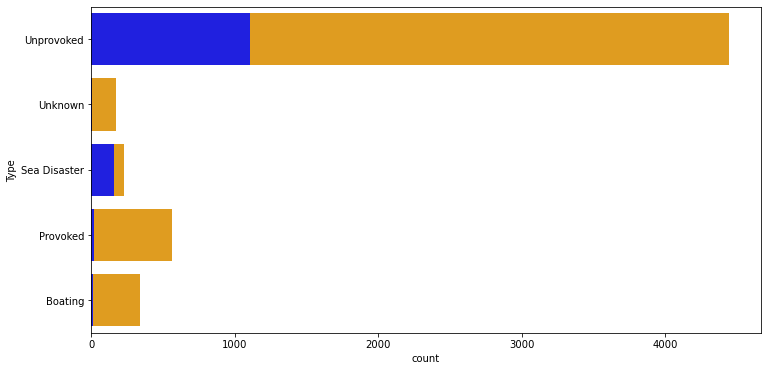

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(y="Type", data=sharks,color="orange",order=types)
sns.countplot(y="Type", data=sharks[sharks["Fatal (Y/N)"] == "Y"],color="blue",order=types)
plt.show()

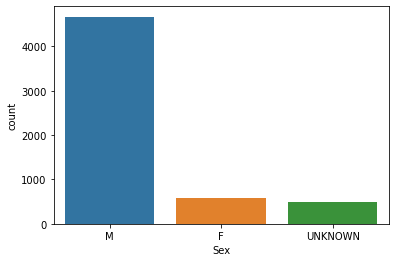

In [29]:
sns.countplot(x="Sex", data=sharks,order=["M","F","UNKNOWN"])
plt.show()

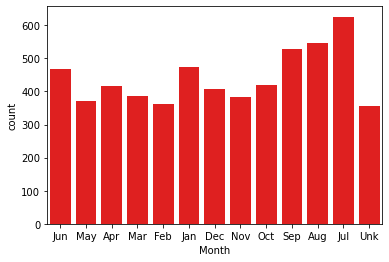

In [30]:
sns.countplot(x="Month", data=sharks,color="red")
plt.show()

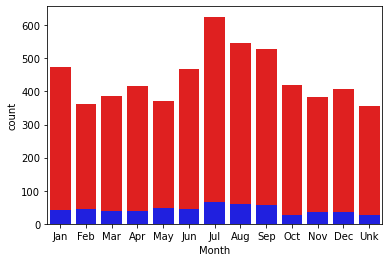

In [31]:
order_months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Unk"]
sns.countplot(x="Month", data=sharks,color="red", order=order_months)
sns.countplot(x="Month", data=sharks[sharks["Type"] == "Provoked"],color="Blue", order=order_months)
plt.show()

## Word counts stuff

In [32]:
def word_count(df):
    counts = dict()
    common = ["the","in","a","&","for","to","of","on","shark","it","were","out",
              "at","by","water","from","into","/","his","her","he","she","men",
             "after","with","was","when","off","sea","and","or","but","down","sharks",
             "him","her","shark's","that","an","went","days","day","3","2","1"]
    
    for string in df: 
        try:
            words = string.replace(",","").replace(".","").replace(";","").split()
        except AttributeError:
            pass

        for word in words:
            if word.lower() in common:
                pass
            elif word.lower() in counts:
                counts[word.lower()] += 1
            else:
                counts[word.lower()] = 1

    return counts

def word_count_injuries(df):
    counts = dict()
    common = ["the","in","a","&","for","to","of","on","shark","it","were","out","boat",
              "at","by","water","from","into","/","his","her","he","she","men","board","m",
             "after","with","was","when","off","sea","and","or","but","down","sharks","have"
             "him","her","shark's","that","an","went","days","day","3","2","1","no","not"]
    
    for string in df: 
        try:
            words = string.replace(",","").replace('"',"").replace(".","").replace(";","").split()
        except AttributeError:
            pass

        for word in words:
            if word.lower() in common:
                pass
            elif word.lower() in counts:
                counts[word.lower()] += 1
            else:
                counts[word.lower()] = 1

    return counts

In [33]:
sharks[sharks["Activity"].notna()]
sharks[sharks["Type"].notna()]

dic = word_count(sharks["Activity"])

activity_words = pd.Series( dic )

In [34]:
activity_words=activity_words.sort_values(ascending=False)
activity_words[:20]

surfing         1129
swimming        1095
fishing          757
diving           525
spearfishing     435
bathing          200
wading           173
standing         158
scuba            141
boat             136
body             136
boarding         131
snorkeling       103
free              99
overboard         98
fell              96
fish              62
capsized          60
floating          54
ship              54
dtype: int64

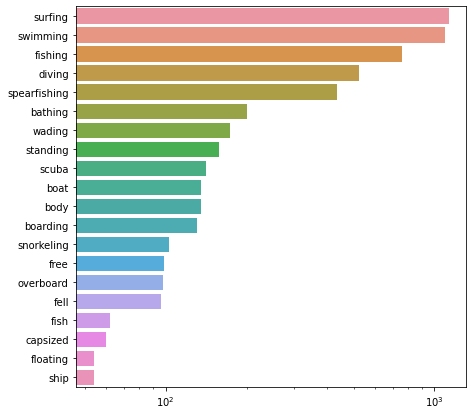

In [35]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.barplot(x=activity_words[:20] ,y=activity_words[:20].index)
plt.show()

In [36]:
sharks=sharks[sharks["Activity"].notna()]
sharks=sharks[sharks["Injury"].notna()]

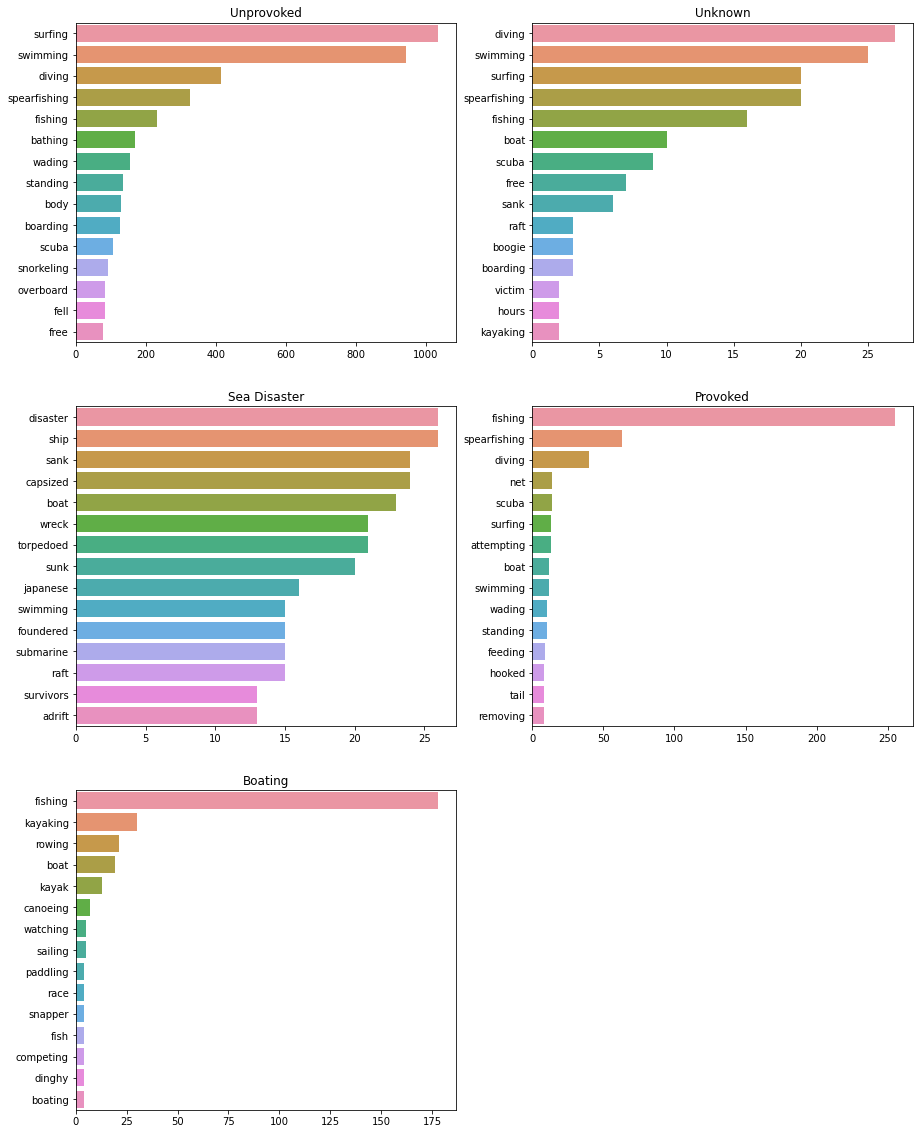

In [37]:


plt.figure(figsize=(15,20))
for i in range(len(types)):
    plt.subplot( len(types)//2+1,len(types)//2, i+1)
    plt.title(types[i])
    dic = word_count(sharks[sharks["Type"] == types[i]]["Activity"])
    injury_words = pd.Series( dic ).sort_values(ascending=False)
    sns.barplot(x=injury_words[:15] ,y=injury_words[:15].index)
plt.show()





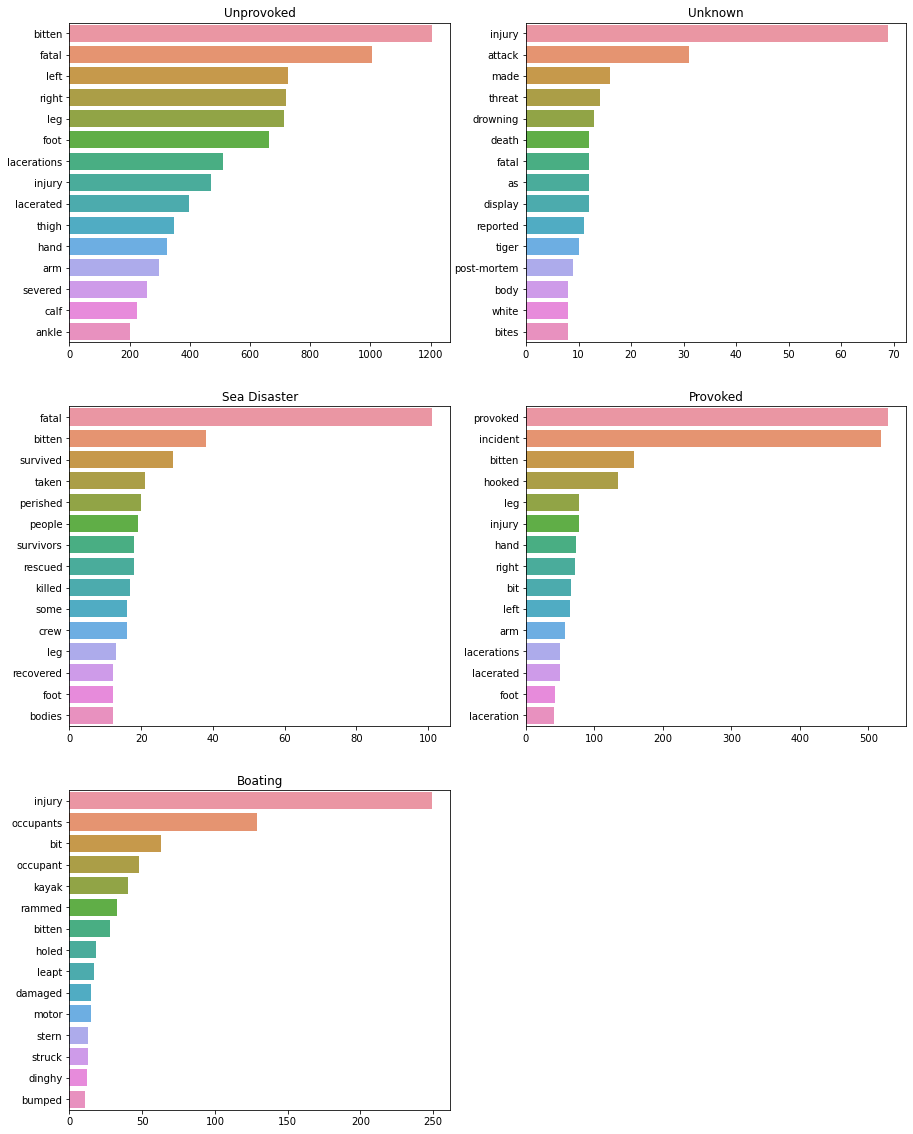

In [38]:

plt.figure(figsize=(15,20))
for i in range(len(types)):
    plt.subplot( len(types)//2+1,len(types)//2, i+1)
    plt.title(types[i])
    dic = word_count_injuries(sharks[sharks["Type"] == types[i]]["Injury"])
    injury_words = pd.Series( dic ).sort_values(ascending=False)
    sns.barplot(x=injury_words[:15] ,y=injury_words[:15].index)
plt.show()



In [39]:
sharks["Type"].value_counts()

Unprovoked      4131
Provoked         532
Boating          292
Sea Disaster     218
Unknown          146
Name: Type, dtype: int64

In [40]:
types = sharks["Type"].unique()